In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

Data prep step

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
print(X.size())
print(X)
y = weight * X + bias

torch.Size([50, 1])
tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])


In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

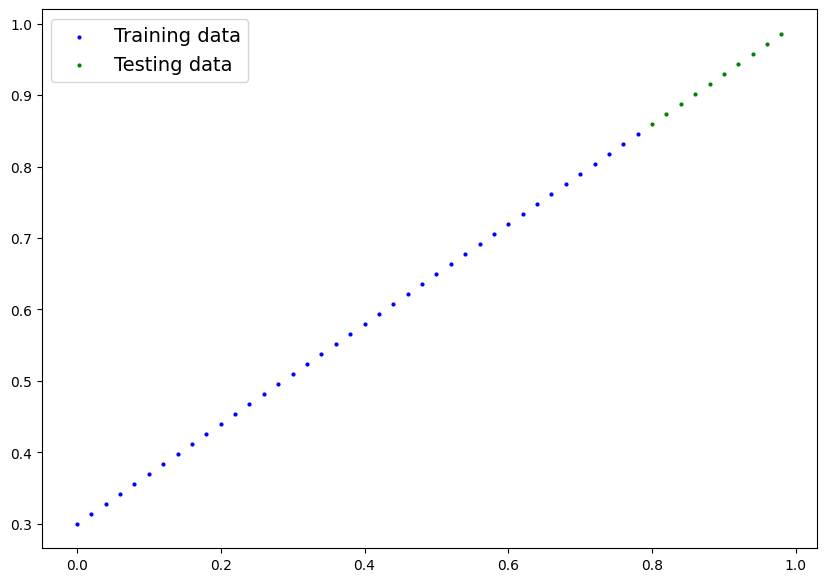

In [ ]:
plot_predictions();

In [ ]:
# Trying out some shitty codes
print(torch.randn(1, requires_grad=True, dtype=torch.float))

tensor([-0.8285], requires_grad=True)


In [ ]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__() # Initialize one nn module which is the superior module
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forwarding method for defining computation and inference method for the model???
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

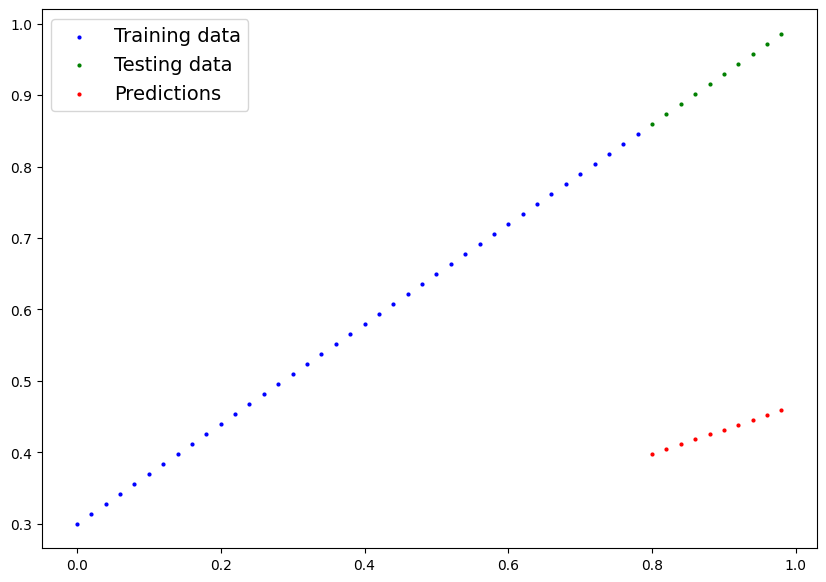

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.0001)

In [ ]:
parameter_0 = [] # Should approach 0.7
parameter_1 = [] # Should approach 0.3
losses = []
test_losses = []

In [ ]:
epochs = 20000


# 0. Loop through the data
for epoch in range(epochs):
  model_0.train() # Set to training mode

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward() ## Confused part for me, will do SC!

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_0.eval() # Turns off gradient tracking, make this an habit

  with torch.inference_mode():
    # Print and store parameters as float32
    # I added the following for sanity check thingy
    params = list(model_0.parameters())  # Convert parameters to a list

    # Access and print specific parameters
    # print("Parameter 0:", params[0])  # Print the first parameter
    # print("Parameter 1:", params[1])  # Print the second parameter

    # Convert parameters to float32 and store as NumPy arrays or tensors
    param_0_float32 = params[0].detach().numpy().astype('float32')  # First parameter as float32
    param_1_float32 = params[1].detach().numpy().astype('float32')  # Second parameter as float32

    parameter_0.append(param_0_float32)
    parameter_1.append(param_1_float32)

    # The following is standard I would say
    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    # Recording all losses
    losses.append(loss.numpy().astype('float32'))
    test_losses.append(test_loss.numpy().astype('float32'))

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4944015145301819
Epoch: 100 | Loss: 0.30135971307754517 | Test Loss: 0.4809292256832123
Epoch: 200 | Loss: 0.28983813524246216 | Test Loss: 0.467457115650177
Epoch: 300 | Loss: 0.27831655740737915 | Test Loss: 0.45398491621017456
Epoch: 400 | Loss: 0.26679491996765137 | Test Loss: 0.4405128061771393
Epoch: 500 | Loss: 0.2552732825279236 | Test Loss: 0.42704063653945923
Epoch: 600 | Loss: 0.24375171959400177 | Test Loss: 0.4135684370994568
Epoch: 700 | Loss: 0.23223009705543518 | Test Loss: 0.40009626746177673
Epoch: 800 | Loss: 0.2207084596157074 | Test Loss: 0.3866240978240967
Epoch: 900 | Loss: 0.2091868668794632 | Test Loss: 0.373151957988739
Epoch: 1000 | Loss: 0.1976652592420578 | Test Loss: 0.3596797585487366
Epoch: 1100 | Loss: 0.1861436665058136 | Test Loss: 0.34620755910873413
Epoch: 1200 | Loss: 0.174622043967247 | Test Loss: 0.33273541927337646
Epoch: 1300 | Loss: 0.16310177743434906 | Test Loss: 0.31926456093788147
Epoch: 

In [ ]:
# Dealing with saved model
loaded_state_dict = torch.load('models/01_pytorch_workflow_model_0.pth')
print(loaded_state_dict)

loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(loaded_state_dict)

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])


<ipython-input-36-a39d5612e2c5>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_state_dict = torch.load('models/01_pytorch_workflow_model_0.pth')


<All keys matched successfully>

In [ ]:
with torch.inference_mode():
  #y_preds_yay = loaded_model(X_test)
  print(loaded_model(X_test) == model_0(X_test))

# plot_predictions(predictions=y_preds_yay)

# list(model_0.parameters())

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


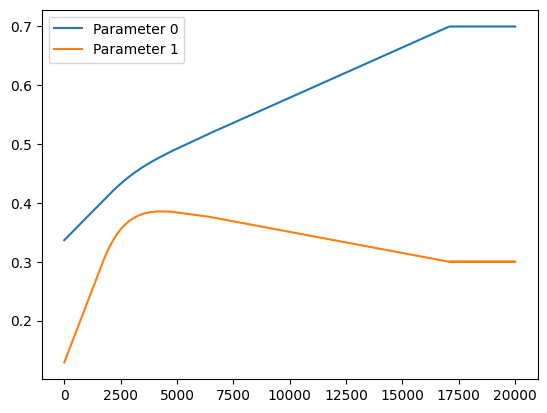

In [ ]:
plt.plot(parameter_0, label='Parameter 0')
plt.plot(parameter_1, label='Parameter 1')
plt.legend()
plt.show()

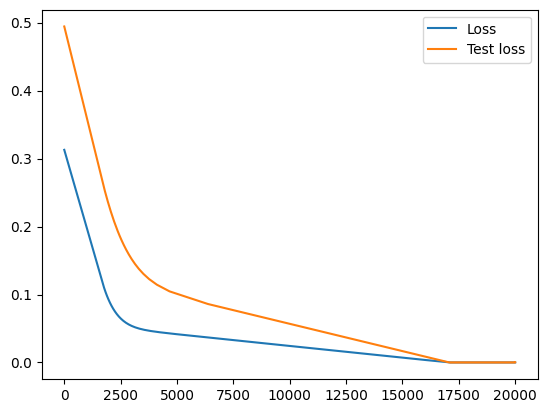

In [ ]:
plt.plot(losses, label="Loss")
plt.plot(test_losses, label="Test loss")
plt.legend()
plt.show()

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6999])), ('bias', tensor([0.3000]))])

In [ ]:
# Save the model hahahahaha
from pathlib import Path
import os
print(os.getcwd())

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(MODEL_SAVE_PATH)
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

/content
models/01_pytorch_workflow_model_0.pth
Saving model to: models/01_pytorch_workflow_model_0.pth




---

\